# Exercises in neural network and deep learning II

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers

## Exercise 2

Based on the **adult dataset**, build a neural network classifier for the target variable `income`. 

In [2]:
df_adult = pd.read_csv("adult.csv")
df_adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


### Data cleaning and transformation

In [3]:
df_adult = df_adult.replace({"<=50K.": "<=50K", ">50K.": ">50K"})
df_adult["income"].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [4]:
print(df_adult.isna().sum())

df_adult = df_adult.dropna()

print(df_adult.isna().sum())

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [5]:
df_adult = df_adult.join(pd.get_dummies(df_adult["workclass"], drop_first=True, dtype=int))
df_adult = df_adult.join(pd.get_dummies(df_adult["education"], drop_first=True, dtype=int))
df_adult = df_adult.join(pd.get_dummies(df_adult["sex"], drop_first=True, dtype=int))
df_adult = df_adult.join(pd.get_dummies(df_adult["income"], drop_first=True, dtype=int))

df_adult = df_adult.drop(columns = ["income", "workclass", "education", "education-num", "occupation", "race", "capital-loss", "fnlwgt", "marital-status", "relationship", "sex", "native-country"])

In [6]:
df_adult

,age,capital-gain,hours-per-week,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,...,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,Male,>50K
0,39,2174,40,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
1,50,0,13,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,38,0,40,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,53,0,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,0,40,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,0,40,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
48837,39,0,36,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
48839,38,0,50,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
48840,44,5455,40,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [7]:
X_adult = df_adult.drop(columns = [">50K"]) # dropping income >50K
y_adult = df_adult[">50K"]

### Training preperation

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_adult, y_adult, test_size=0.25, random_state=17)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [10]:
X_train = np.array(X_train)
X_test = np.array(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

### Model training

In [11]:
def plot_train_validation(history, metrics):
    acc = history.history[metrics[0]]
    epochs = range(1, len(acc) + 1)
    for metric in metrics:  
        val_acc = history.history["val_" + metric]
        loss = history.history["loss"]
        val_loss = history.history["val_loss"]
        plt.plot(epochs, acc, label="Training " + metric)
        plt.plot(epochs, val_acc, label="Validation " + metric)
        plt.title("Training and validation accuracy")
        plt.legend()
        plt.figure()

    acc = history.history[metric]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    plt.plot(epochs, loss, label="Training loss")
    plt.plot(epochs, val_loss, label="Validation loss")
    plt.title("Training and validation loss")
    plt.legend()
    plt.show()

In [12]:
def setup_model(loss_func="binary_crossentropy", output_layer_activation="sigmoid"):
    model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation=output_layer_activation)
    ])

    model.compile(optimizer="rmsprop",
              loss=loss_func,
              metrics=["accuracy"])
    return model

In [13]:
def fit_model(model, X_train, y_train, _epochs=50, _batch_size=64, _verbose=1):
    history = model.fit(X_train,
                        y_train,
                        epochs=_epochs,
                        batch_size=_batch_size,
                        validation_split=0.2,
                        verbose=_verbose)

    return history, model

In [14]:
adult_model = setup_model()

In [15]:
adult_history, adult_model = fit_model(adult_model, X_train, y_train, 80, 128)

Epoch 1/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7315 - loss: 0.5902 - val_accuracy: 0.7932 - val_loss: 0.4398
Epoch 2/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7950 - loss: 0.4477 - val_accuracy: 0.8079 - val_loss: 0.4160
Epoch 3/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8003 - loss: 0.4316 - val_accuracy: 0.8172 - val_loss: 0.4063
Epoch 4/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8122 - loss: 0.4105 - val_accuracy: 0.8221 - val_loss: 0.3985
Epoch 5/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8112 - loss: 0.4140 - val_accuracy: 0.8230 - val_loss: 0.3936
Epoch 6/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8169 - loss: 0.4057 - val_accuracy: 0.8265 - val_loss: 0.3903
Epoch 7/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8152 - loss: 0.4072 - val_accuracy: 0.8270 - val_loss: 0.3881
Epoch 8/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8192 - loss: 0.3961 - val_accuracy: 0.

In [16]:
score = adult_model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1]) # 80, 128

Test loss: 0.38932350277900696
Test accuracy: 0.8266420364379883


#### Test loss: 185.87144470214844 : 50 1024
#### Test accuracy: 0.7739794850349426

#### Test loss: 234.88973999023438 : 50 512
#### Test accuracy: 0.28019484877586365

Test loss: 497.15032958984375 # 50, 64
Test accuracy: 0.6379136443138123

#### Test loss: 386.44134521484375 : 100, 256
#### Test accuracy: 0.7739794850349426

#### Test loss: 411.5776062011719 : 100 64
#### Test accuracy: 0.7709558010101318

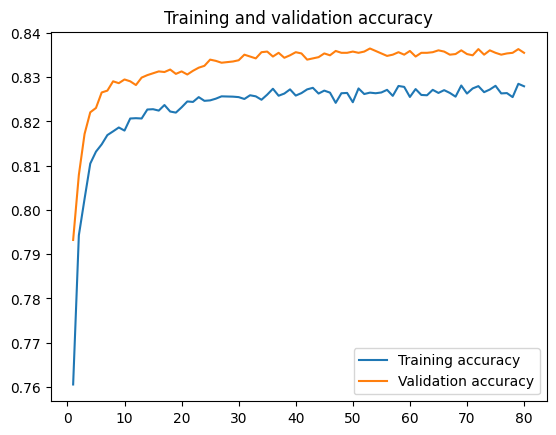

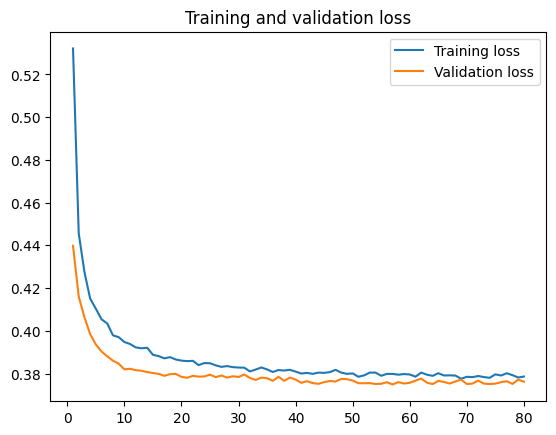

In [17]:
plot_train_validation(adult_history, ["accuracy"])

## Exercise 3

Based on the **AmesHousing dataset** from the class on regression, make a deep learning regression model to predict the sales price variable.

In [19]:
df_ames = pd.read_csv("AmesHousing.csv")
df_ames

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


### Data cleaning and transformation

In [20]:
df_ames.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [21]:
# gives much worse result
#df_ames = df_ames[["Lot Area", "Misc Val", "Yr Sold", "Garage Area", "Bldg Type", "Sale Type", "Sale Condition", "SalePrice"]].copy() 
df_ames = df_ames[["Lot Area", "Misc Val", "Yr Sold", "Bldg Type", "Sale Type", "Sale Condition", "SalePrice"]].copy()

In [22]:
df_ames = df_ames.join(pd.get_dummies(df_ames["Sale Type"], drop_first=True, dtype=int))
df_ames = df_ames.join(pd.get_dummies(df_ames["Sale Condition"], drop_first=True, dtype=int))
df_ames = df_ames.join(pd.get_dummies(df_ames["Bldg Type"], drop_first=True, dtype=int))

df_ames = df_ames.drop(columns = ["Sale Type", "Sale Condition", "Bldg Type"])

In [23]:
df_ames

,Lot Area,Misc Val,Yr Sold,SalePrice,CWD,Con,ConLD,ConLI,ConLw,New,...,WD,AdjLand,Alloca,Family,Normal,Partial,2fmCon,Duplex,Twnhs,TwnhsE
0,31770,0,2010,215000,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,11622,0,2010,105000,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,14267,12500,2010,172000,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,11160,0,2010,244000,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,13830,0,2010,189900,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,7937,0,2006,142500,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2926,8885,0,2006,131000,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2927,10441,700,2006,132000,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2928,10010,0,2006,170000,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [24]:
X_ames = df_ames.drop(columns = "SalePrice")
y_ames = df_ames["SalePrice"]

### Training preperation

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_ames, y_ames, test_size=0.2, random_state=42)

In [26]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
X_train = np.array(X_train)
X_test = np.array(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

In [28]:
X_train

array([[ 0.03380992, -0.09315005,  0.91661939, ..., -0.19159703,
        -0.18429757, -0.29614695],
       [ 2.30708197, -0.09315005,  0.91661939, ..., -0.19159703,
        -0.18429757, -0.29614695],
       [-0.03551382, -0.09315005, -0.6044821 , ...,  5.21928768,
        -0.18429757, -0.29614695],
       ...,
       [-0.16608596, -0.09315005,  0.15606865, ..., -0.19159703,
        -0.18429757, -0.29614695],
       [-0.35032808, -0.09315005,  0.15606865, ..., -0.19159703,
        -0.18429757, -0.29614695],
       [-0.36374558, -0.09315005,  0.91661939, ..., -0.19159703,
        -0.18429757, -0.29614695]])

### Model training

In [29]:
def setup_regression_model():
    model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    # they have no significant impact on the result, altough they make the training time be faster, though hardly needed for this small data set
    #layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    #layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dense(1)
    ])

    model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["mae"])
    return model

In [30]:
ames_model = setup_regression_model()

In [31]:
ames_history, ames_model = fit_model(ames_model, X_train, y_train, 100, 64, 0)

In [32]:
score = ames_model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test mae:", score[1]) 

Test loss: 6221283328.0
Test mae: 54607.2265625


#### Test loss: 7626186752.0 : dense 32, 32, 32
#### Test mae: 59875.6640625 

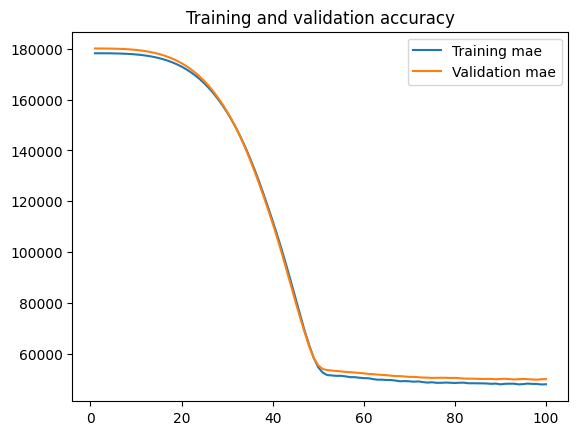

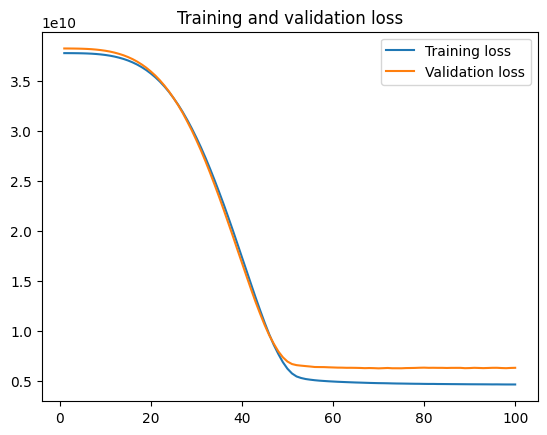

In [33]:
plot_train_validation(ames_history, ["mae"])

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 39487156224.0000 - mae: 180675.7812 - val_loss: 38208724992.0000 - val_mae: 180083.8438
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37742485504.0000 - mae: 178638.7344 - val_loss: 38205579264.0000 - val_mae: 180075.8281
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37895999488.0000 - mae: 178363.2812 - val_loss: 38199676928.0000 - val_mae: 180060.7031
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37405523968.0000 - mae: 178033.3906 - val_loss: 38189096960.0000 - val_mae: 180033.9062
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37160407040.0000 - mae: 176727.6562 - val_loss: 38171795456.0000 - val_mae: 179990.3125
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39575965696.0000 - mae: 181919.9688 - val_loss: 38146240512.0000 - val_mae: 179926.3281
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38495514624.0000 - mae: 180093.0000 - val_loss: 38110126080.0000 -

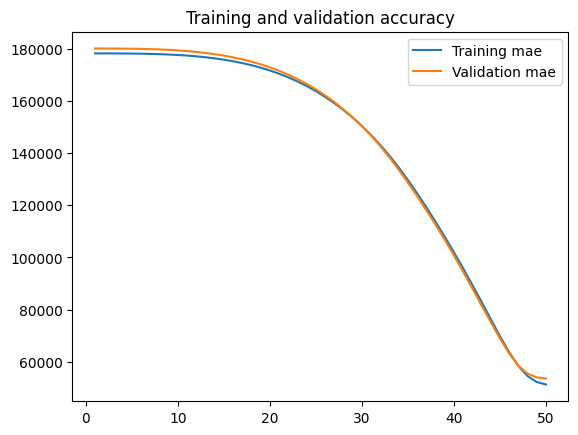

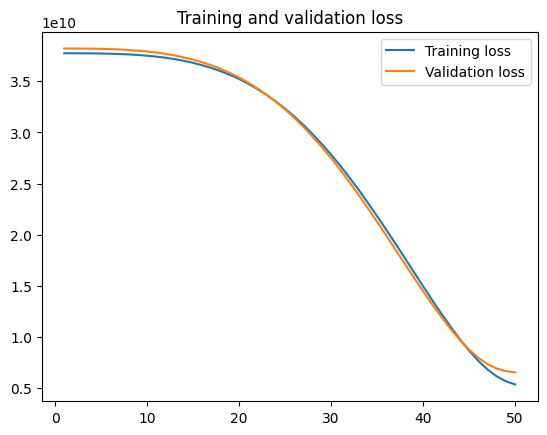

In [34]:
ames_model = setup_regression_model()
ames_history, ames_model = fit_model(ames_model, X_train, y_train, 50, 64)

score = ames_model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test mae:", score[1]) 

plot_train_validation(ames_history, ["mae"])